# NYC Property Sales Data Science Project

This notebook really just looks at the relationships between the different data columns, esepcially prices and areas. This data has been filtered out and cleaned for use through the pandas library to ensure that the values can be used properly. Additionally, new data columns have been created such as Price per Square Feet to explore how it is affected per reigon that it is in.

Dataset: [NYC Property Sales on Kaggle](<https://www.kaggle.com/datasets/new-york-city/nyc-property-sales/data>)

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import math


In [3]:
#Reading in our dataset
df = pd.read_csv("nyc-rolling-sales.csv", index_col = 0)  
df.reset_index(drop = True, inplace = True)

#exploring the dataset
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Sale Price vs. Borough

In [5]:
#Filtering the sale price column to ensure all rows contain numerical values
df['SALE PRICE']
df = df[df['SALE PRICE'].str.isnumeric()]
df['SALE PRICE'] = df['SALE PRICE'].astype(float)
df = df[df['SALE PRICE'] > 1000]

In [6]:
#Setting the values to find the relationship between the boroughs and their median sale price per home
df.groupby(['BOROUGH'])['SALE PRICE'].median()
boroughs = df.groupby(['BOROUGH'])['SALE PRICE'].median().index
borough_prices = df.groupby(['BOROUGH'])['SALE PRICE'].median().values

In [7]:
#Looking at the variables
boroughs
borough_prices

array([1170000.,  410000.,  772279.,  500000.,  470000.])

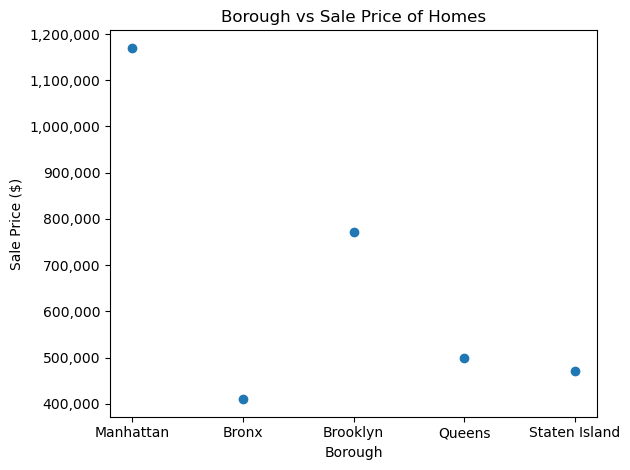

In [8]:
#Plotting our data
plt.scatter(boroughs, borough_prices)
plt.xticks((1, 2, 3, 4, 5), ('Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'))
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Borough vs Sale Price of Homes")
plt.xlabel("Borough")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()

# Sale Price vs. Neighborhood

In [10]:
#Setting the values to find the relationship between the neighborhoods  and their median sale price per home
neighborhood_series = df.groupby('NEIGHBORHOOD')['SALE PRICE'].median().sort_values(ascending = False)[0:10]
neighborhood = neighborhood_series.index
neighborhood_price =  neighborhood_series.values

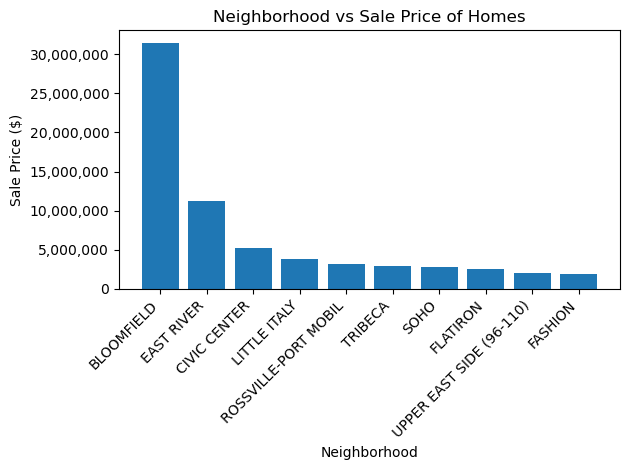

In [11]:
#Plotting the data through a bar chart
plt.bar(neighborhood, neighborhood_price)
plt.xticks(rotation = 45, ha = 'right')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title("Neighborhood vs Sale Price of Homes")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price ($)")
plt.tight_layout()
plt.show()

# Creating the new Price Per Square Feet data column

In [13]:
#Feature Engineering a new column to find the Price Per Square Feet for every building
df = df[df['GROSS SQUARE FEET'].str.isnumeric()]
df.loc[:, 'GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype(float)
df = df[df['GROSS SQUARE FEET']  > 0]

df.loc[:, 'PRICE PER SQUARE FEET'] = df['SALE PRICE'] / df['GROSS SQUARE FEET']
df = df[df['PRICE PER SQUARE FEET'] > 0]
trunc = lambda x: math.trunc(x)
df.loc[:, 'PRICE PER SQUARE FEET'] = df['PRICE PER SQUARE FEET'].map(trunc)

In [14]:
#Taking a look at the new dataset
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,PRICE PER SQUARE FEET
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,1028
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,579
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,1733
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,0,8,1750,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,755
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,0,24,4489,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,0,2,2400,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00,174
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,0,2,2498,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00,231
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,0,2,4000,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00,307
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,7,208033,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00,182


In [15]:
#Using the groupby function to check out the different median prices for each neighborhood's price per square foot median (just the top 10) 
df.groupby('NEIGHBORHOOD')['PRICE PER SQUARE FEET'].median().sort_values(ascending = False)[0:10]

NEIGHBORHOOD
UPPER EAST SIDE (59-79)      1850.0
GREENWICH VILLAGE-CENTRAL    1770.0
SOHO                         1755.0
GREENWICH VILLAGE-WEST       1739.0
DOWNTOWN-FULTON MALL         1661.0
BROOKLYN HEIGHTS             1390.0
CHELSEA                      1368.5
GRAMERCY                     1361.0
CLINTON                      1359.5
MIDTOWN CBD                  1235.0
Name: PRICE PER SQUARE FEET, dtype: object

# Sale Price vs. Gross Square Feet

In [17]:
#Exploring the relaionship between Sale Price and Gross Square Feet
#Since we expect a relationship between the values here, need to ensure that outliers are removed to graph it clearly
min_price, max_price = df['SALE PRICE'].quantile([.1, .99])
min_sqft, max_sqft = df['GROSS SQUARE FEET'].quantile([.1, .99])

removed_outlier_df = df[(df['SALE PRICE'] >= min_price) & (df['SALE PRICE'] <= max_price) & (df['GROSS SQUARE FEET'] >= min_sqft) & (df['GROSS SQUARE FEET'] <= max_sqft)].copy()

filtered_df = removed_outlier_df[removed_outlier_df['BOROUGH'] == 2]

sale_price = filtered_df['SALE PRICE'].values
sqr_feet = filtered_df['GROSS SQUARE FEET'].values

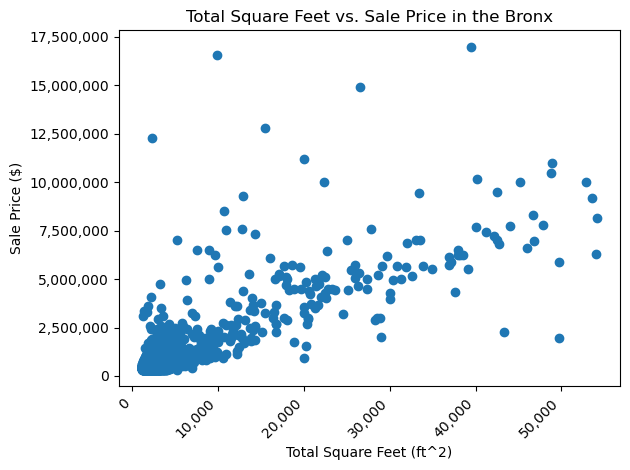

In [34]:
#Plotting our data
plt.scatter(sqr_feet, sale_price)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Total Square Feet (ft^2)")
plt.ylabel("Sale Price ($)")
plt.title("Total Square Feet vs. Sale Price in the Bronx")
plt.tight_layout()
plt.show()

# Conclusions

Nothing too surpsing for the relationships emerging from the dataset. It was particularly exciting to see that linear relationship between total square feet and sale price in the Bronx. When I originally tried using the Manhattan borough, there were too many outliers which makes sense as the price will greatly vary between the exact location in Manhattan and building type.